# Exploratory Data Analysis on Red-Wine Data

##Exploratory data analysis (EDA) includes using graphics and visualizations to explore and analyze a dataset. This way summerizing the datasets main characteristics, often with visual methods becomes possible.

--2022-09-30 03:30:28--  https://c.tenor.com/YLuZbuHOxnkAAAAC/red-wine.gif
Resolving c.tenor.com (c.tenor.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connecting to c.tenor.com (c.tenor.com)|108.177.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142985 (140K) [image/gif]
Saving to: ‘red-wine.gif’

red-wine.gif        100%[===================>] 139.63K  --.-KB/s    in 0.001s  

2022-09-30 03:30:28 (127 MB/s) - ‘red-wine.gif’ saved [142985/142985]



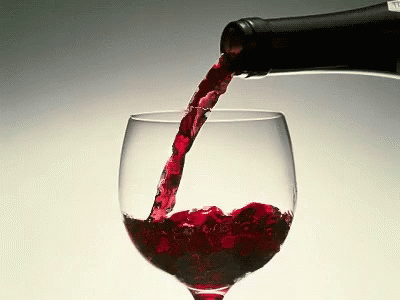

In [ ]:
import warnings; warnings.simplefilter('ignore')
from IPython.display import Image
#Image(url='https://c.tenor.com/YLuZbuHOxnkAAAAC/red-wine.gif')
!wget https://c.tenor.com/YLuZbuHOxnkAAAAC/red-wine.gif
Image(open('/content/red-wine.gif','rb').read())

### Data Collections 

#### Here, Red-Wine datasets were used because they are standard datasets for exploratory data analysis. The datasets are also numerical. Hence, the datasets are downloaded using **!wget** command.

In [ ]:
!wget https://huggingface.co/datasets/lvwerra/red-wine/raw/main/winequality-red.csv

--2022-09-30 03:30:31--  https://huggingface.co/datasets/lvwerra/red-wine/raw/main/winequality-red.csv
Resolving huggingface.co (huggingface.co)... 52.5.54.249, 44.195.102.200, 54.173.5.192, ...
Connecting to huggingface.co (huggingface.co)|52.5.54.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91999 (90K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  89.84K   523KB/s    in 0.2s    

2022-09-30 03:30:32 (523 KB/s) - ‘winequality-red.csv’ saved [91999/91999]



### Importing Libraries


#### Required libraries and modules for exploratory data Analysis are loaded.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

### Loading dataset as a pandas dataframe.

#### Then datasets are loaded using **"pd.read_csv(CSV-path)"**  command.

In [ ]:
Datapath = "/content/winequality-red.csv"

df = pd.read_csv(Datapath)
# Let's display the top 8 rows 
df.head(8)      

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7

### Data checking

#### Then let's check the eight last rows of the datasets.

In [ ]:
df.tail(8)   

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1591            5.4             0.740         0.09             1.7      0.089   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1591                 16.0                  26.0  0.99402  3.67       0.56   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1591     11.6        6  
1592     11.0        6  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

#### One of the important matters in data analysis is knowing data types. 
#### This can be implemented easily by **"df.dtypes"**.

###  Data processing

#### Droping unnecessary data are necessary for any EDA. But in this tutorial, we will save it to a dataframe called **dfDroped**.

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
dfDroped = df.drop(['fixed acidity'], axis=1).copy(deep=True)
dfDroped.head(4)

volatile acidity  citric acid  residual sugar  chlorides  \
0              0.70         0.00             1.9      0.076   
1              0.88         0.00             2.6      0.098   
2              0.76         0.04             2.3      0.092   
3              0.28         0.56             1.9      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6

#### In the next phase, how to drop duplicated columns will be shown.

#### Hence let's add a column to a dataframe and call it **dfDuplicated**.

In [ ]:
dfDuplicated=df.copy(deep=True)
dfDuplicated['fixed acidity1']=df.loc[:,'fixed acidity']

print("👇 Please check the last column that \" fixed acidity1 \" is added  👇 \n" )
dfDuplicated.head(6)

👇 Please check the last column that " fixed acidity1 " is added  👇 



fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  fixed acidity1  
0      9.4        5             7.4  
1      9.8        5             7.8  
2      9.8        5             7.8  
3      9.8        6            11.2  
4      9.4        5             7.4  
5      9.4        5             7.4

#### Then let's correct "**dfDuplicated**" and make a new dataframe called "**CorrecteddfDuplicated**".

In [ ]:
def drop_duplicate_cols(df):
    uniq, idxs = np.unique(df, return_index=True, axis=1)
    return pd.DataFrame(uniq, index=df.index, columns=df.columns[idxs])
print("The shape of duplicate columns: ", dfDuplicated.shape)
print('\n')

CorrecteddfDuplicated=drop_duplicate_cols(dfDuplicated).copy(deep=True)
print("The shape of corrected  columns: ", CorrecteddfDuplicated.shape,'\n\n')
print("👇 Please check the last column \" fixed acidity1 \" is removed 👇 \n" )
CorrecteddfDuplicated.head(6)


The shape of duplicate columns:  (1599, 13)


The shape of corrected  columns:  (1599, 12) 


👇 Please check the last column " fixed acidity1 " is removed 👇 



citric acid  chlorides  sulphates  volatile acidity  density  \
0         0.00      0.076       0.56              0.70   0.9978   
1         0.00      0.098       0.68              0.88   0.9968   
2         0.04      0.092       0.65              0.76   0.9970   
3         0.56      0.075       0.58              0.28   0.9980   
4         0.00      0.076       0.56              0.70   0.9978   
5         0.00      0.075       0.56              0.66   0.9978   

   residual sugar    pH  quality  fixed acidity  alcohol  free sulfur dioxide  \
0             1.9  3.51      5.0            7.4      9.4                 11.0   
1             2.6  3.20      5.0            7.8      9.8                 25.0   
2             2.3  3.26      5.0            7.8      9.8                 15.0   
3             1.9  3.16      6.0           11.2      9.8                 17.0   
4             1.9  3.51      5.0            7.4      9.4                 11.0   
5             1.8  3.51      5.0            7.4      9.4                 13.0   

   total sulfur dioxide  
0                  34.0  
1                  67.0  
2                  54.0  
3                  60.0  
4                  34.0  
5                  40.0

#### Now we are going to count the number of rows and columns.
"**df.count(axis='columns')**" Counts for each row, while "**df.count(axis='rows')**"counts number of columns.

Reference: ☛ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html

In [ ]:
print("\033[1mBelow is the number of rows\n")
print(df.count(axis='columns'))
print( "\n\033[1mBelow is the number of columns\n")
df.count(axis='rows')

Below is the number of rows

0       12
1       12
2       12
3       12
4       12
        ..
1594    12
1595    12
1596    12
1597    12
1598    12
Length: 1599, dtype: int64

Below is the number of columns



fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

#### Sometimes, it is necessary to process the data before analysing them. 
#### One of these processes is removing "nan", "null", and "none" entries from a dataset. 

#### Check if there is a null
#### **".isnull().sum()"** command shows that there is no missing value in each column.

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Using **".isnull().sum()"**, it is apparent that there is no "nan" value in each column. 

In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Let's randomly insert "nan" in different locations of the datafram of dataframe "**df**" and call it a new dataframe "**dfWithNan**". 

In [ ]:
dfWithNan = df.copy(deep=True)
for col in dfWithNan.columns:
    dfWithNan.loc[dfWithNan.sample(frac=0.1).index, col] = pd.np.nan


dfWithNan.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4               NaN         0.00             NaN      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76          NaN             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51        NaN   
1                 25.0                   NaN   0.9968  3.20       0.68   
2                  NaN                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0  
3      9.8      6.0  
4      9.4      5.0

#### Now, it is clear that there are 160 missing data in each column.

In [ ]:
dfWithNan.isna().sum()

fixed acidity           160
volatile acidity        160
citric acid             160
residual sugar          160
chlorides               160
free sulfur dioxide     160
total sulfur dioxide    160
density                 160
pH                      160
sulphates               160
alcohol                 160
quality                 160
dtype: int64

#### Next, we are going to remove the missing entries.

In [ ]:
# dfWithNan['column name'].isna().sum()
print("\033[1mnumber of \"Nan\" in each columns\n")
print(dfWithNan.isna().sum())
print("\n\033[mnumber of \"Nan\" in index \"0\" rows\n")
print("\033[",dfWithNan.loc[[0]].isna().sum().sum(),'\n')
dfDropedNA = dfWithNan.dropna().copy(deep=True)    # Dropping the missing values.
print("\033[1mnumber of \"Nan\" in each columns\n")
print(dfDropedNA.isna().sum())
print("\n\033[mnumber of \"Nan\" in index \"0\" row of proccessed dataframe. 👇\n")

## Let's add the base class for all built-in exceptions

try:
  print("\033[",dfDropedNA.loc[[0]].isna().sum().sum(),'\n')
except BaseException :
  print("No Nan were found in each row")

number of "Nan" in each columns

fixed acidity           160
volatile acidity        160
citric acid             160
residual sugar          160
chlorides               160
free sulfur dioxide     160
total sulfur dioxide    160
density                 160
pH                      160
sulphates               160
alcohol                 160
quality                 160
dtype: int64

number of "Nan" in index "0" rows

[ 3 

number of "Nan" in each columns

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

number of "Nan" in index "0" row of proccessed dataframe. 👇

No Nan were found in each row


#### As you can see, no nan was found in each row. This shows that nan data are entirely removed. 

In [ ]:
dfDropedNA.head(8)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
6             7.9             0.600         0.06             1.6      0.069   
10            6.7             0.580         0.08             1.8      0.097   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
21            7.6             0.390         0.31             2.3      0.082   
23            8.5             0.490         0.11             2.3      0.084   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
10                 15.0                  65.0   0.9959  3.28       0.54   
12                 16.0                  59.0   0.9943  3.58       0.52   
13                  9.0                  29.0   0.9974  3.26       1.56   
21                 23.0                  71.0   0.9982  3.52       0.65   
23                  9.0                  67.0   0.9968  3.17       0.53   

    alcohol  quality  
3       9.8      6.0  
4       9.4      5.0  
6       9.4      5.0  
10      9.2      5.0  
12      9.9      5.0  
13      9.1      5.0  
21      9.7      5.0  
23      9.4      5.0

### Descriptive Statistics
### (Now one of the most exciting parts begins)

#### Descriptive statistics can give you great insight into the shape of each attribute.
Sometimes it is necessary to check the summary of the data. The "describe()" function on the Pandas dataframe lists eight statistical properties of each attribute:

a). Count

b). Mean

c). Standard Deviation

d). Minimum Value

e). 25th Percentile

f). 50th Percentile (Median)

g). 75th Percentile

h). Maximum Value

In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### Heatmap (Data correlation)

#### In this section, we will calculate the correlation between the chemical properties of red wine using a heatmap, seaborn.

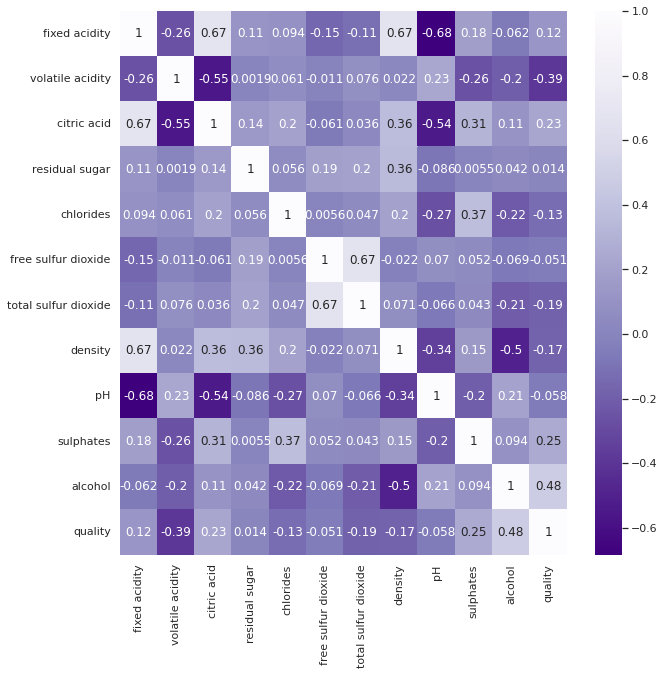

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Purples_r')

### Count Plot


#### Now, let’s do a count plot to visualize the above data 
#### Count Plot shows the count of observations in each categorical bin, using bars instead of a quantitative variable, like a histogram. 



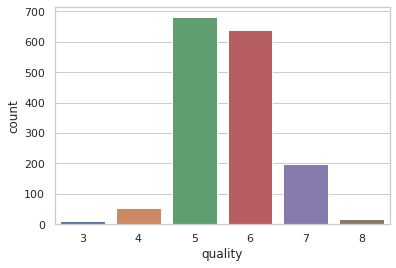

In [ ]:
## Let's set a background for the plot.
sns.set_theme(style="whitegrid")

sns.countplot(x='quality', data=df)

### Histogram

#### A histogram shoes statistical information that utilizes rectangles to illustrate the frequency of data items in successive numerical intervals of equal size.

<function matplotlib.pyplot.show(*args, **kw)>

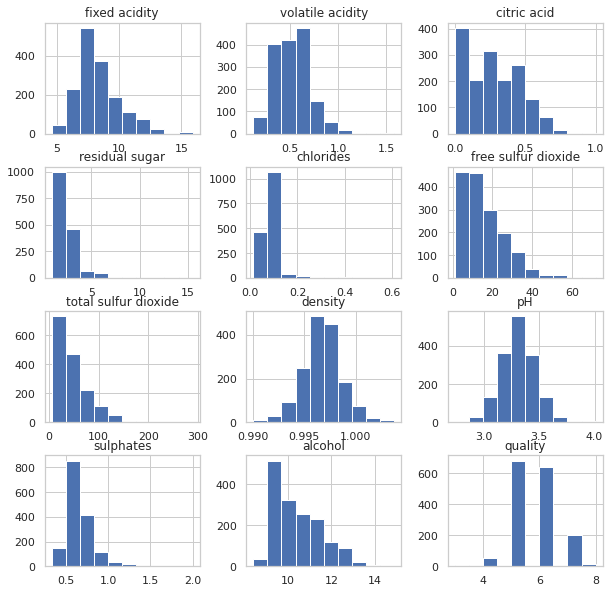

In [ ]:
df.hist(bins=10, figsize=(10,10))
plt.show

### Pairs plot

#### A pairs plot shows pairwise relationships in a dataset. In addition, it provides a square subplot with a histogram in the main dimeter (each data by itself), and a scatter plot elsewhere.

[]

<Figure size 720x576 with 0 Axes>

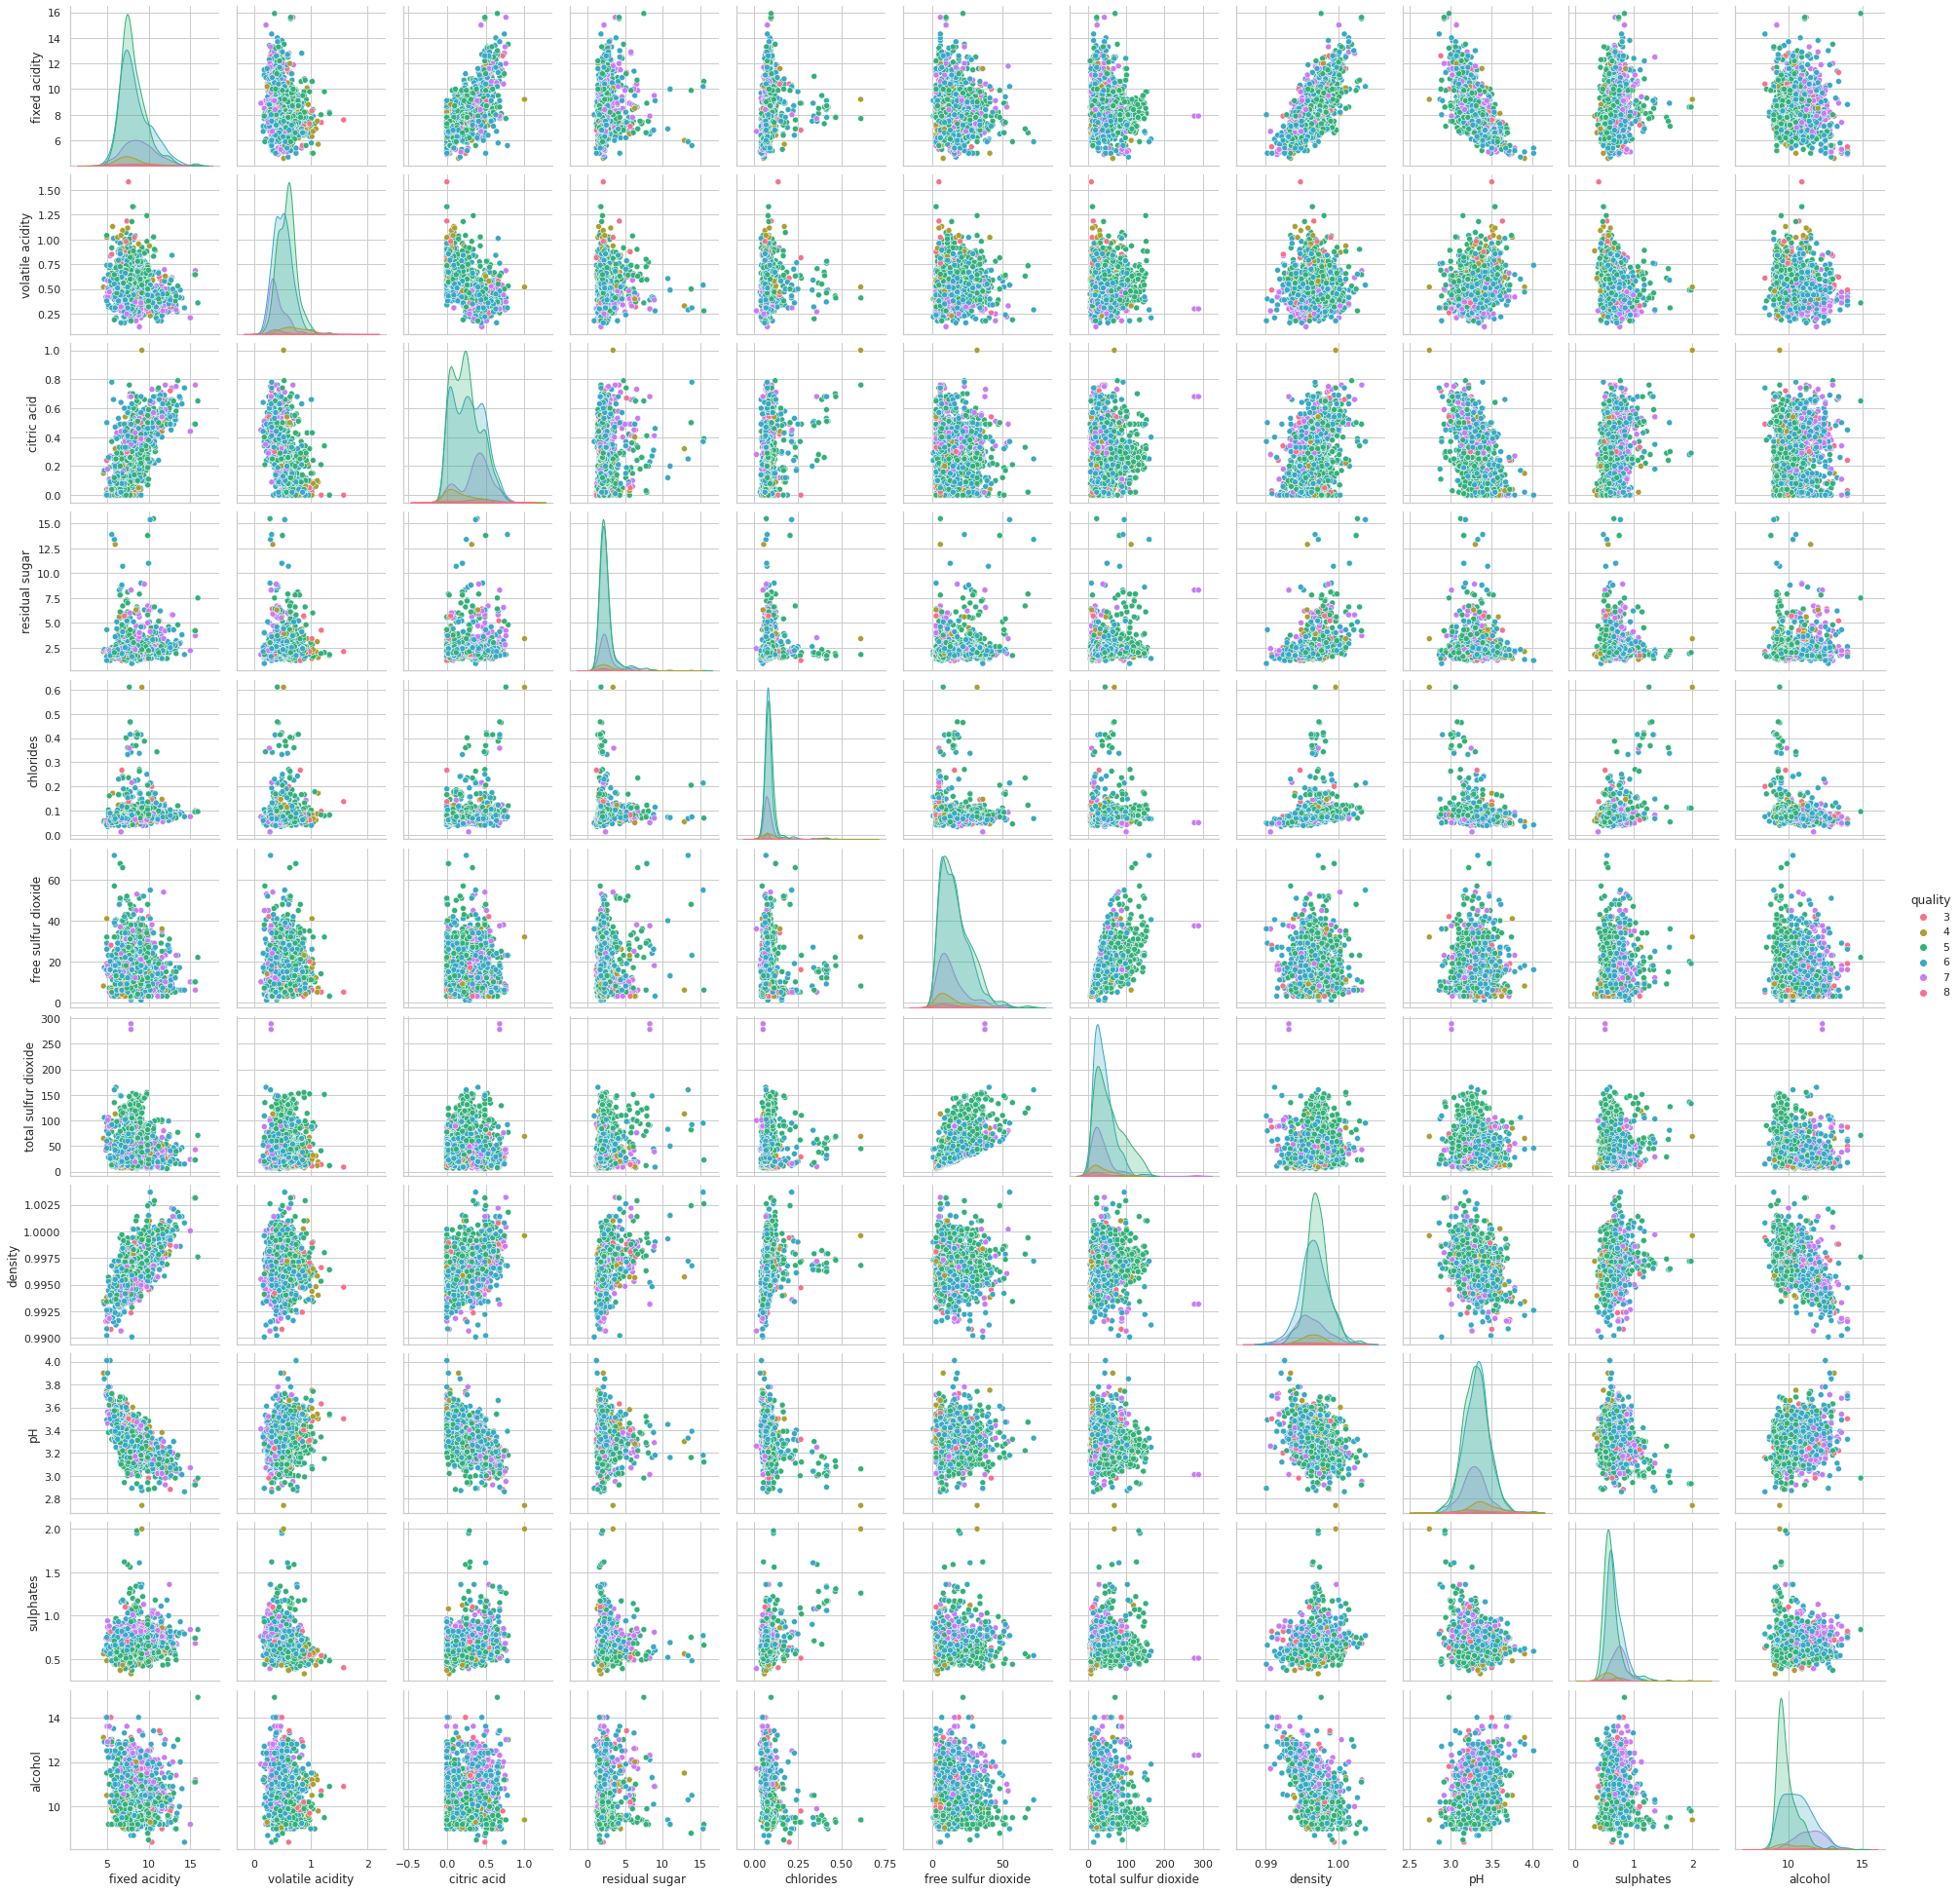

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue="quality", palette="husl")
plt.plot()

### Box Plot

#### The following plot shows a box plot of the quality versus other data. The box shows the quartiles of the dataset while the whiskers (like a line) extend to show the rest of the distribution, except for points that are determined to be “outliers” using a function method of the interquartile range.


reference:👉 https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn-boxplot

#### The below plots show the interpertaions of the box plot.

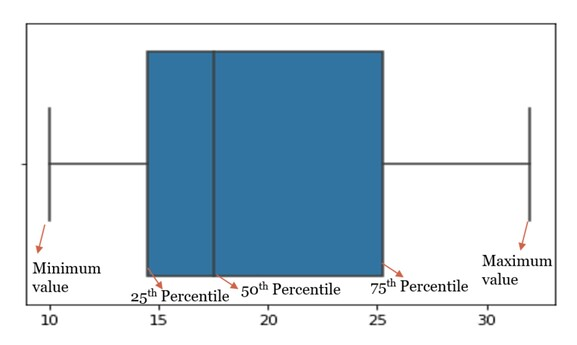

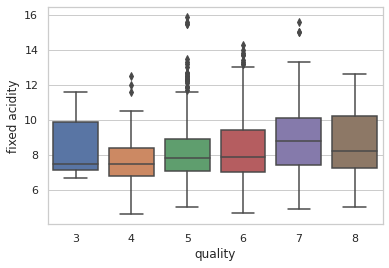

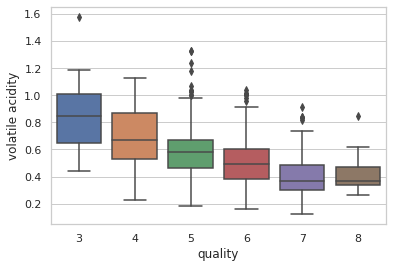

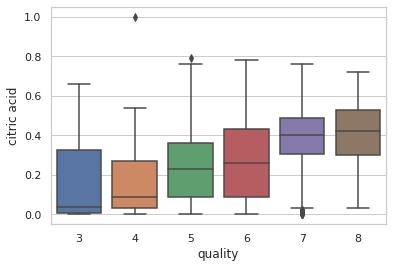

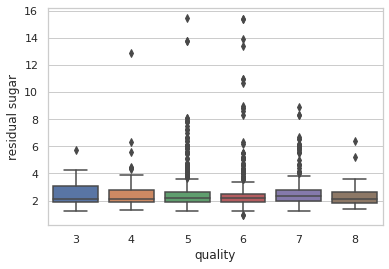

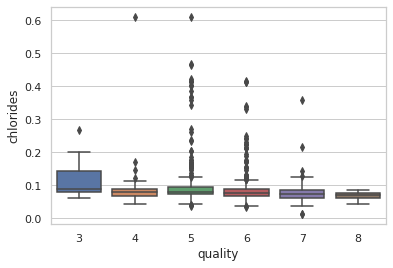

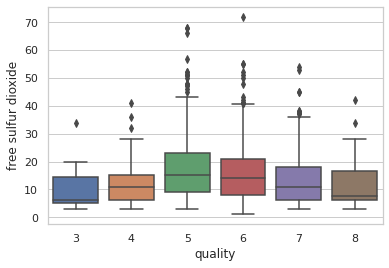

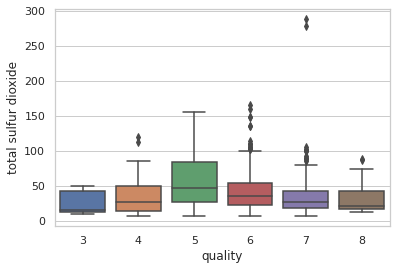

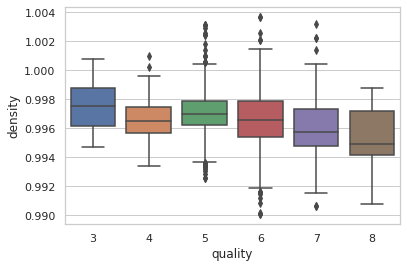

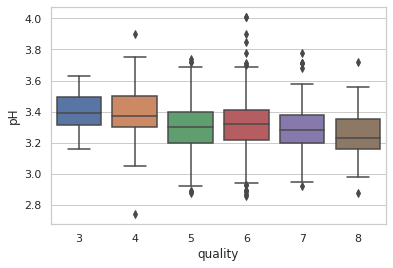

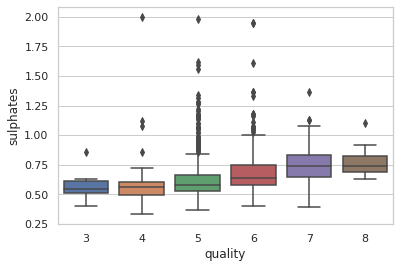

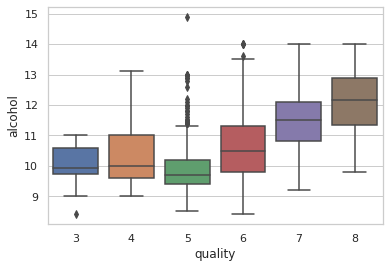

In [ ]:
for i in df.columns[:-1]:
    plt.figure()
    sns.boxplot(x=df['quality'], y=df[i])
    plt.plot()

####Outliers can be visualized using a "box plot."
#### Any points outside of the maximum and minimum value are considered an outlier.


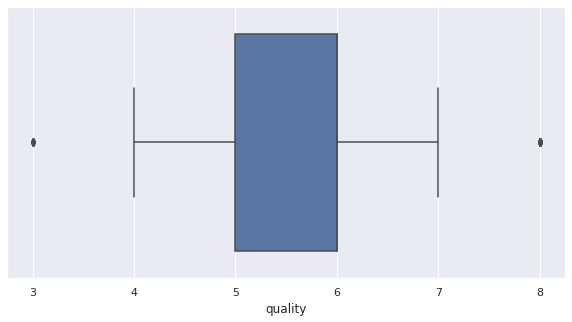

In [ ]:
sns.boxplot(x=df['quality'])

In [ ]:
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Scatter Plot

#### A scatter plot shows the relationship between two quantitative variables and provides a point by point data on two (x and y) axis. 

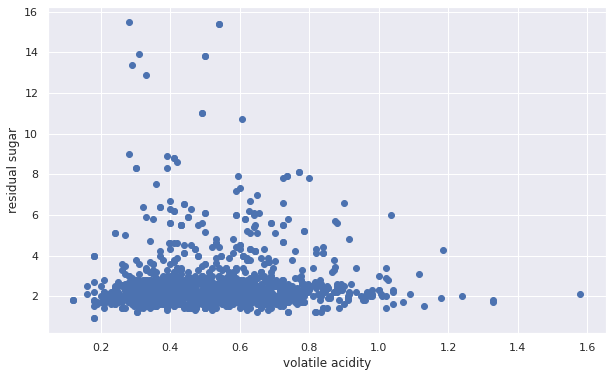

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['volatile acidity'], df['residual sugar'])
ax.set_xlabel('volatile acidity')
ax.set_ylabel('residual sugar')
plt.show()

--2022-09-30 03:34:17--  https://www.funimada.com/assets/images/cards/big/congrats-7.gif
Resolving www.funimada.com (www.funimada.com)... 46.4.34.162
Connecting to www.funimada.com (www.funimada.com)|46.4.34.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1417466 (1.4M) [image/gif]
Saving to: ‘congrats-7.gif.1’

congrats-7.gif.1    100%[===================>]   1.35M  --.-KB/s    in 0.07s   

2022-09-30 03:34:17 (20.7 MB/s) - ‘congrats-7.gif.1’ saved [1417466/1417466]



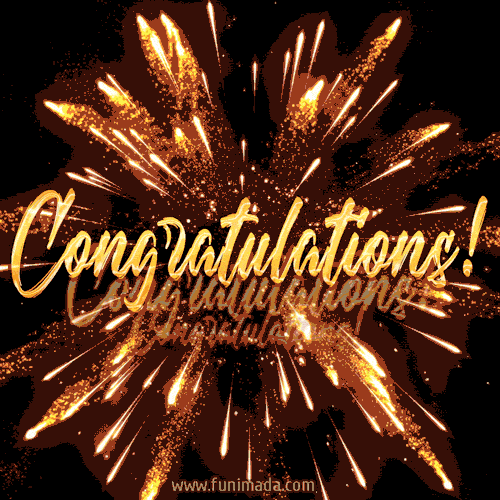

In [ ]:
import warnings; warnings.simplefilter('ignore')
from IPython.display import Image
#Image(url='https://c.tenor.com/YLuZbuHOxnkAAAAC/red-wine.gif')
!wget https://www.funimada.com/assets/images/cards/big/congrats-7.gif
Image(open('/content/congrats-7.gif','rb').read())

### Congratulations, you completed Exploratory Data Analysis (EDA) successfully.